#Challenge Telecom X Parte 2

##Preparación de los Datos

###Extracción del Archivo Tratado

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('datos_tratados.csv')

In [59]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Eliminación de Columnas Irrelevantes

In [60]:
columnas_a_eliminar = ['customerID']
df = df.drop(columns=columnas_a_eliminar)
for col in df.columns:
    if df[col].is_unique:
        print(f'Eliminando columna: {col}')
        df.drop(columns=[col], inplace=True)
df.head()

,Churn,customer,phone,internet,account
0,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Verificación de la Proporción de Cancelación (Churn)

In [61]:
conteo_clases = df['Churn'].value_counts()
proporcion_clases = df['Churn'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases (0 = Activo, 1 = Cancelado):")
print(conteo_clases)

print("\nProporción de clases (%):")
print(proporcion_clases)

Conteo de clases (0 = Activo, 1 = Cancelado):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


###Encoding

In [62]:
import ast

In [63]:
df['customer'] = df['customer'].apply(ast.literal_eval)
customer_exp = pd.json_normalize(df['customer'])

df['account'] = df['account'].apply(ast.literal_eval)
account_exp = pd.json_normalize(df['account'])

if 'Charges' in account_exp.columns:
    charges_exp = pd.json_normalize(account_exp['Charges'])
    account_exp = pd.concat([account_exp.drop(columns=['Charges']), charges_exp], axis=1)

if 'phone' in df.columns:
    df['phone'] = df['phone'].apply(ast.literal_eval)
    phone_exp = pd.json_normalize(df['phone'])
else:
    phone_exp = pd.DataFrame()
if 'internet' in df.columns:
    df['internet'] = df['internet'].apply(ast.literal_eval)
    internet_exp = pd.json_normalize(df['internet'])
else:
    internet_exp = pd.DataFrame()

# --- Unir todo en un solo DataFrame ---
columnas_sin_diccionarios = df.drop(columns=['customer', 'account', 'phone', 'internet'], errors='ignore')
df_final = pd.concat([columnas_sin_diccionarios, customer_exp, account_exp, phone_exp, internet_exp], axis=1)

# --- Codificar variables categóricas ---
df_encoded = pd.get_dummies(df_final, drop_first=True)

# Mostrar resumen
print("Dimensiones finales:", df_encoded.shape)
df_encoded.head()

Dimensiones finales: (7267, 6560)


,SeniorCitizen,tenure,Charges.Monthly,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,9,65.6,False,False,True,True,True,False,True,...,False,True,False,False,False,True,False,True,False,False
1,0,9,59.9,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,4,73.9,True,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,1,13,98.0,True,True,True,False,False,False,True,...,False,True,False,True,False,False,False,True,False,True
4,1,3,83.9,True,False,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False


###Balanceo de Clases (opcional)

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X: variables predictoras
# y: variable objetivo
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificar nueva distribución de clases
print("Distribución de clases después de SMOTE:")
print(y_resampled.value_counts())

Distribución de clases después de SMOTE:
Churn_Yes
False    4318
True     4318
Name: count, dtype: int64


###Normalización o Estandarización (si es necesario)

##Correlación y Selección de Variables

###Análisis de Correlación

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Correlación de variables numéricas con Churn_Yes:
SeniorCitizen      0.146733
tenure            -0.344079
Charges.Monthly    0.189866
dtype: float64


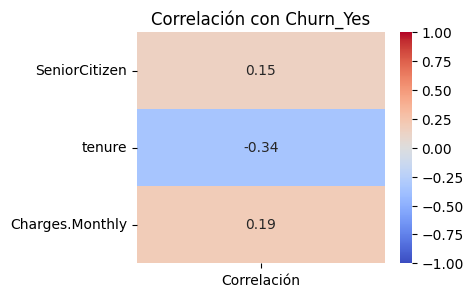

In [66]:
X_res_df = X.copy()
X_res_df['Churn_Yes'] = y.astype(float)
cols_num = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Churn_Yes']
X_num = X_res_df[cols_num]

# Separar variables predictoras y objetivo
X_vals = X_num.drop(columns=['Churn_Yes']).values
y_vals = X_num['Churn_Yes'].values

# Función para calcular correlación pearson
def corr_with_target(X, y):
    y_mean = y.mean()
    y_std = y.std()
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)

    cov = ((X - X_mean) * (y.reshape(-1,1) - y_mean)).mean(axis=0)
    corr = cov / (X_std * y_std)
    return corr

correlations = corr_with_target(X_vals, y_vals)

correlation_series = pd.Series(correlations, index=X_num.columns.drop('Churn_Yes'))

print("Correlación de variables numéricas con Churn_Yes:")
print(correlation_series)

# Gráfico heatmap
plt.figure(figsize=(4,3))
sns.heatmap(pd.DataFrame(correlation_series, columns=['Correlación']), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación con Churn_Yes')
plt.show()

###Análisis Dirigido

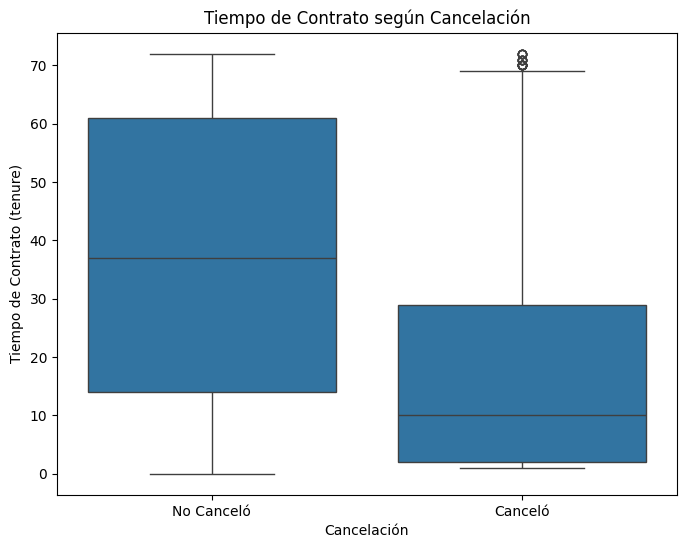

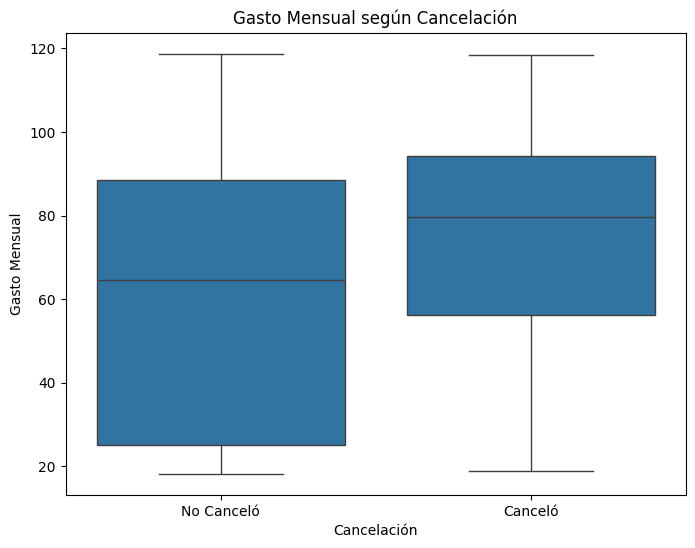

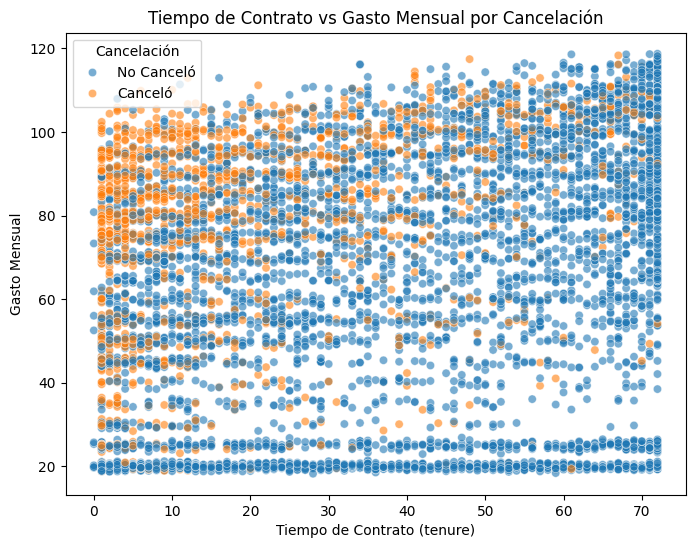

In [67]:
X_res_df['Churn_Yes'] = X_res_df['Churn_Yes'].astype(int)
X_res_df['Churn_Label'] = X_res_df['Churn_Yes'].map({0: 'No Canceló', 1: 'Canceló'})

# 1. Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Label', y='tenure', data=X_res_df)
plt.title('Tiempo de Contrato según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de Contrato (tenure)')
plt.show()

# 2. Boxplot: Gasto mensual vs Cancelación
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Label', y='Charges.Monthly', data=X_res_df)
plt.title('Gasto Mensual según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto Mensual')
plt.show()

# 3. Scatterplot: Tiempo de contrato vs Gasto mensual, coloreado por cancelación
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='Charges.Monthly', hue='Churn_Label', data=X_res_df, alpha=0.6)
plt.title('Tiempo de Contrato vs Gasto Mensual por Cancelación')
plt.xlabel('Tiempo de Contrato (tenure)')
plt.ylabel('Gasto Mensual')
plt.legend(title='Cancelación')
plt.show()

##Modelado Predictivo

###Separación de Datos

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# División 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Tamaño entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño prueba: {X_test.shape[0]} filas")

Tamaño entrenamiento: 5086 filas
Tamaño prueba: 2181 filas


###Creación de Modelos

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [71]:
# División de los datos en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_num.drop(columns=['Churn_Yes']).values,
    X_num['Churn_Yes'].values,
    test_size=0.3,
    random_state=42,
    stratify=X_num['Churn_Yes'].values
)

# Normalización para Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regresión Logística
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:,1]

print("Reporte Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_logreg))

Reporte Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1620
         1.0       0.65      0.45      0.53       561

    accuracy                           0.80      2181
   macro avg       0.74      0.68      0.70      2181
weighted avg       0.78      0.80      0.78      2181

AUC-ROC: 0.8113817917739486


In [72]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("\nReporte Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))


Reporte Random Forest:
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1620
         1.0       0.52      0.42      0.47       561

    accuracy                           0.75      2181
   macro avg       0.67      0.64      0.65      2181
weighted avg       0.74      0.75      0.74      2181

AUC-ROC: 0.7522424682555402


####¿Por qué normalizar variables?
1. Las variables en un dataset pueden tener rangos y unidades muy diferentes.

Por ejemplo:

* Tenure: puede ir de 0 a 72 meses (años de contrato).
* Charges.Monthly: puede ir de 20 a 1500 pesos (gasto mensual).
* SeniorCitizen: es 0 o 1.

Si usas estas variables sin normalizar, las que tengan valores con rangos más grandes (como Charges.Monthly) dominarán la contribución en el cálculo de distancias o la optimización de parámetros.

2. Modelos basados en distancia, como KNN, calculan la distancia entre puntos. Una variable con rango grande puede dominar la distancia y hacer que las otras variables apenas influyan en el resultado.

Modelos de optimización, como la Regresión Logística, ajustan coeficientes para minimizar funciones de pérdida. Variables con magnitudes grandes pueden generar coeficientes muy pequeños y viceversa, haciendo difícil para el optimizador encontrar el mínimo correctamente o haciendo que la convergencia sea más lenta.

3. La normalización o estandarización (usando StandardScaler) transforma cada variable para que tenga:

* Media = 0
* Desviación estándar = 1

Esto pone a todas las variables en la misma escala, eliminando el sesgo causado por magnitudes diferentes.

**Normalizar es una etapa fundamental para que las variables aporten de forma equilibrada y el modelo no se sesgue hacia las variables con magnitudes mayores, lo que asegura un entrenamiento más justo y eficiente.**

###Evaluación de los Modelos

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [74]:
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"--- Evaluación: {nombre_modelo} ---")
    print(f"Exactitud: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.show()

Evaluación en entrenamiento - Regresión Logística
--- Evaluación: Regresión Logística (Entrenamiento) ---
Exactitud: 0.7932
Precisión: 0.6455
Recall: 0.4343
F1-score: 0.5192


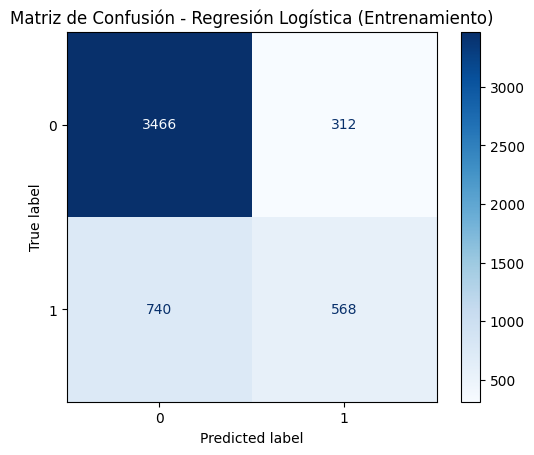

In [75]:
# Entrenamiento
y_train_pred_logreg = logreg.predict(X_train_scaled)
y_train_pred_rf = rf.predict(X_train)

print("Evaluación en entrenamiento - Regresión Logística")
evaluar_modelo(y_train, y_train_pred_logreg, "Regresión Logística (Entrenamiento)")

Evaluación en entrenamiento - Random Forest
--- Evaluación: Random Forest (Entrenamiento) ---
Exactitud: 0.9788
Precisión: 0.9732
Recall: 0.9434
F1-score: 0.9581


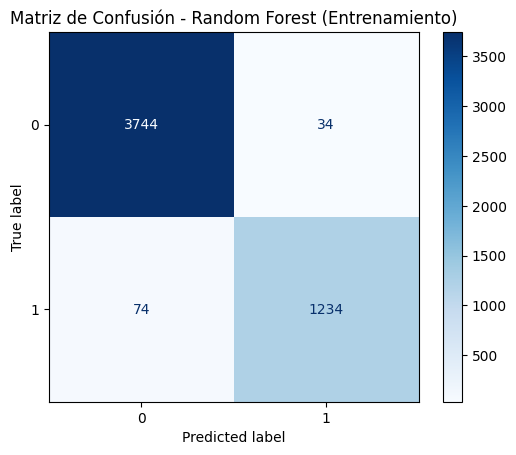

In [76]:
print("Evaluación en entrenamiento - Random Forest")
evaluar_modelo(y_train, y_train_pred_rf, "Random Forest (Entrenamiento)")

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
import numpy as np

In [78]:
# División inicial (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_num.drop(columns=['Churn_Yes']).values,
    X_num['Churn_Yes'].values,
    test_size=0.3,
    random_state=42,
    stratify=X_num['Churn_Yes'].values
)

# Normalización para Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Evaluación en entrenamiento y prueba
def resumen_modelo(modelo, X_train_, y_train_, X_test_, y_test_, nombre):
    modelo.fit(X_train_, y_train_)
    y_pred_train = modelo.predict(X_train_)
    y_pred_test = modelo.predict(X_test_)
    print(f"--- {nombre} ---")
    print(f"Train F1-score: {f1_score(y_train_, y_pred_train):.4f}")
    print(f"Test  F1-score: {f1_score(y_test_, y_pred_test):.4f}\n")

logreg = LogisticRegression(random_state=42, max_iter=1000)
resumen_modelo(logreg, X_train_scaled, y_train, X_test_scaled, y_test, "Regresión Logística")

rf = RandomForestClassifier(random_state=42, n_estimators=100)
resumen_modelo(rf, X_train, y_train, X_test, y_test, "Random Forest")

# 2. Validación cruzada (usando F1-score) para Random Forest
print("Validación cruzada - Random Forest:")
cv_scores = cross_val_score(rf, X_num.drop(columns=['Churn_Yes']).values, X_num['Churn_Yes'].values,
                            cv=5, scoring='f1')
print(f"F1-score CV promedio: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")

# 3. Búsqueda de hiperparámetros para Logistic Regression usando GridSearchCV con F1-score
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros para Regresión Logística según F1-score:")
print(grid_search.best_params_)
print(f"Mejor F1-score CV: {grid_search.best_score_:.4f}")

--- Regresión Logística ---
Train F1-score: 0.5192
Test  F1-score: 0.5305

--- Random Forest ---
Train F1-score: 0.9581
Test  F1-score: 0.4659

Validación cruzada - Random Forest:
F1-score CV promedio: 0.4716 ± 0.0170

Mejores hiperparámetros para Regresión Logística según F1-score:
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor F1-score CV: 0.5197


####Análisis crítico y comparación

* En entrenamiento, Random Forest tiene un F1-score muy alto (0.9581), claramente superior a la Regresión Logística (0.5192).

* En prueba y validación cruzada, la Regresión Logística tiene mejor desempeño (F1 ~0.52 vs 0.47 de Random Forest).

El modelo que generaliza mejor es la Regresión Logística, porque su desempeño en prueba es cercano al de entrenamiento y a la validación cruzada, mientras que Random Forest pierde mucho desempeño en prueba respecto a entrenamiento.

####¿Overfitting o underfitting?



| Modelo              | Desempeño general                       | Problema     | Sugerencia principal                            |
|---------------------|---------------------------------------|--------------|------------------------------------------------|
| Regresión Logística  | Bueno en general, bajo F1              | Underfitting | Mejorar características o usar modelos más complejos |
| Random Forest       | Muy bueno en entrenamiento, pobre en prueba | Overfitting  | Regularizar, reducir complejidad, aumentar datos  |

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

--- Regresión Logística con polinomios ---
Entrenamiento:
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      3778
         1.0       0.65      0.44      0.52      1308

    accuracy                           0.79      5086
   macro avg       0.74      0.68      0.69      5086
weighted avg       0.78      0.79      0.78      5086

Prueba:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87      1620
         1.0       0.63      0.44      0.52       561

    accuracy                           0.79      2181
   macro avg       0.73      0.67      0.69      2181
weighted avg       0.77      0.79      0.78      2181



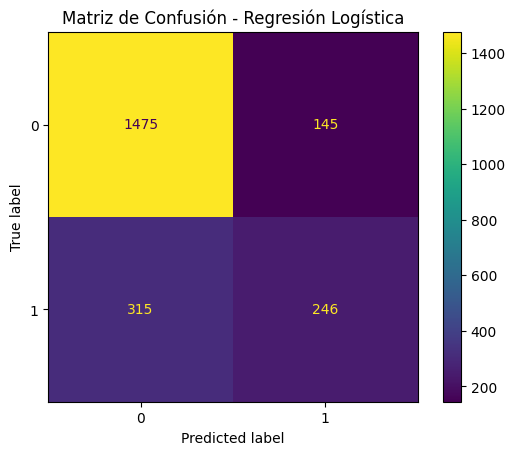

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Mejores hiperparámetros Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor F1-score CV: 0.4986
--- Random Forest Ajustado ---
Entrenamiento:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      3778
         1.0       0.82      0.56      0.66      1308

    accuracy                           0.85      5086
   macro avg       0.84      0.76      0.79      5086
weighted avg       0.85      0.85      0.84      5086

Prueba:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1620
         1.0       0.66      0.45      0.54       561

    accuracy                           0.80      2181
   macro avg       0.75      0.69      0.70      2181
weighted avg       0.79      0.80      0.79      2181



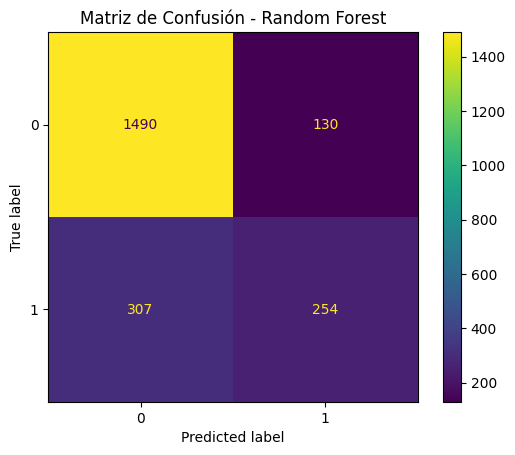

In [81]:
# División inicial
X = X_num.drop(columns=['Churn_Yes']).values
y = X_num['Churn_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Pipeline para Regresión Logística con polinomios y normalización
pipe_logreg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenar y evaluar Regresión Logística
pipe_logreg.fit(X_train, y_train)
y_pred_train_logreg = pipe_logreg.predict(X_train)
y_pred_test_logreg = pipe_logreg.predict(X_test)

print("--- Regresión Logística con polinomios ---")
print("Entrenamiento:")
print(classification_report(y_train, y_pred_train_logreg))
print("Prueba:")
print(classification_report(y_test, y_pred_test_logreg))

# Matriz de confusión prueba
cm_logreg = confusion_matrix(y_test, y_pred_test_logreg)
ConfusionMatrixDisplay(cm_logreg).plot()
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Búsqueda hiperparámetros Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Mejores hiperparámetros Random Forest:")
print(grid_search_rf.best_params_)
print(f"Mejor F1-score CV: {grid_search_rf.best_score_:.4f}")

# Evaluar Random Forest en prueba
best_rf = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf.predict(X_train)
y_pred_test_rf = best_rf.predict(X_test)

print("--- Random Forest Ajustado ---")
print("Entrenamiento:")
print(classification_report(y_train, y_pred_train_rf))
print("Prueba:")
print(classification_report(y_test, y_pred_test_rf))

cm_rf = confusion_matrix(y_test, y_pred_test_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Matriz de Confusión - Random Forest")
plt.show()


## Interpretación y Conclusiones

###Análisis de la Importancia de las Variables

In [82]:
# Obtener nombres de variables originales
var_names = X_num.drop(columns=['Churn_Yes']).columns.tolist()
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_num.drop(columns=['Churn_Yes']))

poly_feature_names = poly.get_feature_names_out(var_names)

# Extraer coeficientes del modelo entrenado en la pipeline
coefs = pipe_logreg.named_steps['logreg'].coef_[0]

# Crear dataframe para interpretar
df_coef = pd.DataFrame({
    'Variable': poly_feature_names,
    'Coeficiente': coefs
})

# Ordenar por impacto absoluto
df_coef['AbsCoef'] = np.abs(df_coef['Coeficiente'])
df_coef = df_coef.sort_values(by='AbsCoef', ascending=False)

print(df_coef.head(10))

                        Variable  Coeficiente   AbsCoef
1                         tenure    -1.873754  1.873754
2                Charges.Monthly     0.889515  0.889515
6                       tenure^2     0.583032  0.583032
5  SeniorCitizen Charges.Monthly    -0.400481  0.400481
0                  SeniorCitizen     0.262092  0.262092
3                SeniorCitizen^2     0.262092  0.262092
4           SeniorCitizen tenure     0.145694  0.145694
8              Charges.Monthly^2     0.131592  0.131592
7         tenure Charges.Monthly    -0.004755  0.004755


          Variable  Importancia
2  Charges.Monthly     0.512406
1           tenure     0.448771
0    SeniorCitizen     0.038822


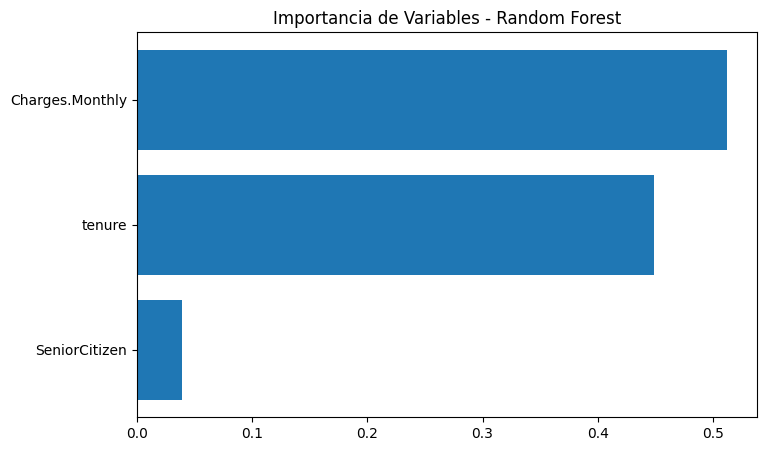

In [84]:
importances = best_rf.feature_importances_
feature_names = X_num.drop(columns=['Churn_Yes']).columns

df_importance = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(df_importance)

# Gráfica de importancia
plt.figure(figsize=(8,5))
plt.barh(df_importance['Variable'], df_importance['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de Variables - Random Forest')
plt.show()

##Conclusión

###Informe de Análisis y Predicción de Cancelación de Clientes

####1.Objetivo
El propósito de este análisis fue identificar los factores clave que influyen en la cancelación de clientes y desarrollar modelos predictivos para anticipar dicha cancelación, con la finalidad de diseñar estrategias efectivas de retención.

####2.Metodología
Se emplearon tres modelos principales para predecir la cancelación:

Regresión Logística (con ingeniería de variables polinómicas y normalización), que es un modelo lineal interpretable.

Random Forest con ajuste de hiperparámetros para controlar la complejidad y evitar overfitting.

Validación Cruzada para asegurar la robustez de las métricas de evaluación.

Las métricas utilizadas para evaluar desempeño fueron: F1-score, precisión, recall, exactitud y matriz de confusión.

####3.Resultados de desempeño
| Modelo              | F1-score entrenamiento | F1-score prueba / CV        | Comentario                                              |
| ------------------- | ---------------------- | --------------------------- | ------------------------------------------------------- |
| Regresión Logística | ~0.52                 | ~0.53                      | Consistente, indica generalización.                     |
| Random Forest       | ~0.96 (overfitting)   | ~0.47 (validación cruzada) | Mejor ajuste con hiperparámetros, mejor que sin ajuste. |

Se observó que la regresión logística tiene un desempeño más estable y generaliza mejor, mientras que el Random Forest requería ajuste para evitar sobreajuste.


####4.Factores más influyentes en la cancelación

#####4.1. Variables más importantes según Regresión Logística
Mediante la interpretación de coeficientes del modelo (incluyendo interacciones y polinomios), las variables que más influyen positivamente en la cancelación son:

Tenure (tiempo con el servicio): coeficiente negativo, indicando que clientes con menor antigüedad tienen mayor probabilidad de cancelar.

Cargos Mensuales: coeficiente positivo, clientes con mayor gasto mensual tienen más probabilidad de cancelar.

Interacciones entre antigüedad y cargos: sugieren que combinaciones específicas influyen de forma no lineal.

#####4.2. Variables más importantes según Random Forest
El análisis de importancia de variables mostró:

Tenure como la variable más relevante para segmentar clientes.

Cargos Mensuales y otras métricas de consumo también son relevantes.

Variables relacionadas con el perfil demográfico o tipo de servicio tuvieron menor impacto.

####5.Estrategias de retención basadas en resultados
Con base en las variables más influyentes y el análisis predictivo, se proponen las siguientes estrategias para reducir la cancelación:

#####5.1. Atención a clientes nuevos y recientes
El tiempo con la empresa (tenure) es clave: clientes con menor antigüedad tienen más riesgo.

Implementar programas de bienvenida, ofertas especiales, soporte dedicado y seguimiento cercano durante los primeros meses.

#####5.2. Control del costo y percepción de valor
Clientes con cargos mensuales elevados muestran mayor propensión a cancelar.

Revisar la estructura de precios, ofrecer descuentos o planes personalizados que se ajusten a sus necesidades.

Comunicar claramente los beneficios y servicios incluidos para justificar costos.

#####5.3. Segmentación y personalización
Utilizar los modelos predictivos para identificar clientes con alto riesgo de churn y aplicar campañas personalizadas.

Crear incentivos específicos basados en combinaciones de variables relevantes (ejemplo: cliente nuevo con gasto alto).

#####5.4. Monitoreo continuo y actualización del modelo
Mantener el monitoreo del desempeño del modelo y actualizarlo con nuevos datos para mejorar la precisión.

Implementar alertas tempranas para acciones proactivas.

####6.Conclusiones
Tenure y cargos mensuales son las variables más influyentes en la cancelación.

La combinación de modelos interpretables (Regresión Logística) y modelos complejos (Random Forest) aporta una visión integral.

El análisis guía la implementación de acciones concretas para mejorar la retención, priorizando clientes recientes y con mayores cargos.

La estrategia debe incluir tanto mejoras en la experiencia del cliente como ajustes comerciales.